# Análise de Dados de Crédito
### Dataset
**'Crédito'**. Classificação de registros de clientes como bons ou maus pagadores de crédito com base nos atributos de seus pedidos de crédito (*cheque_especial*, *historico*, *propósito*, *tempo_empregado*, *local* ,*estado_civil*, *idade*, *tipo_de_residencia*, entre outros)

### Proposta
Análise dos dados das características *idade*, *sexo* e *histórico de crédito* e a relação com a classe 'bom/mau pagador'

In [2]:
# =====   Importação das Bibliotecas   ===== #
from pandas import read_csv
import matplotlib.pyplot as plt

In [4]:
base = read_csv('Credito.csv', sep=';', encoding='latin1')

## Análise por Idade
Análise da proporção entre bons e maus pagadores segundo os intervalos de idade

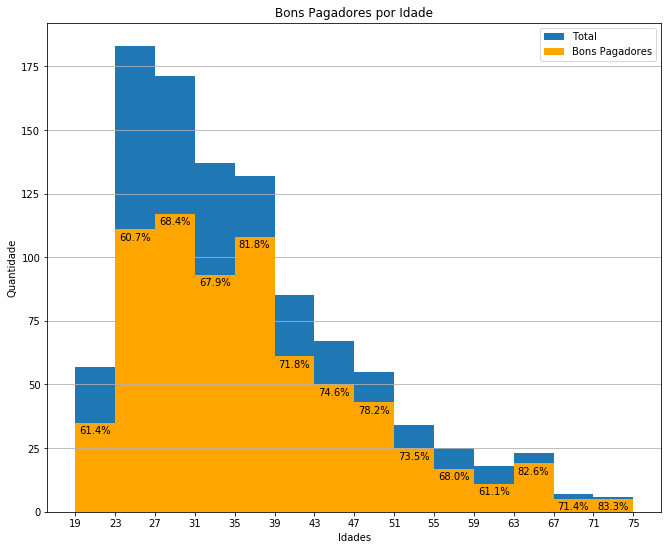

In [5]:
# =====   Analise por Idade   ===== #

plt.figure(figsize=(11,9))
idade_total = plt.hist(base['IDADE'], list(range(19,76,4)), label='Total')
idade_bom = plt.hist(base['IDADE'].loc[base['CLASSE'] == 'bom'], list(range(19,76,4)),
         color='orange', label='Bons Pagadores')
plt.xticks(list(range(19,76, 4)))
plt.ylabel("Quantidade")
plt.xlabel("Idades")
plt.title("Bons Pagadores por Idade")
plt.legend()
plt.grid(axis='y')
j = 0
for i in list(range(19,76, 4)):
    try:
        texto = '{:.1f}%'.format(idade_bom[0][j]/idade_total[0][j] * 100)
        plt.text(i+0.4, idade_bom[0][j]-5, texto, verticalalignment='bottom')
    except:
        pass
    finally:
        j += 1

### Conclusão:
Pessoas com idade de **até 35 anos** tendem a apresentar um **nível de inadimplência um pouco maior** (abaixo de 70% de bons pagadores), sendo pagadores um pouco menos confiáveis.

Pessoas na faixa de idade **35~55** e **>63 anos** tendem a ser **pagadores mais confiáveis** (acima de 70% de bons pagadores)

OBS: O baixo número de registros acima de 51 anos reduzem a confiança de seus resultados

## Análise por Sexo

In [7]:
# =====   Analise por Sexo   ===== #
def compara_sexos():
    # Analise Devedores Femininos
    fem_bom = len(fem.loc[fem['CLASSE'] == 'bom'])
    fem_ruim = len(fem.loc[fem['CLASSE'] == 'ruim'])

    plt.figure(figsize=(10,5))
    plt.suptitle("Bom/Mau Pagador\n(Sexo)", fontsize="x-large")
    plt.subplot(1,2,1)
    plt.pie([fem_bom, fem_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
            autopct= lambda p: '{:.1f}%'.format(p))
    plt.title('Mulheres')
    
    # Analise Devedores Masculinos
    masc_bom = len(masc.loc[masc['CLASSE'] == 'bom'])
    masc_ruim = len(masc.loc[masc['CLASSE'] == 'ruim'])

    plt.subplot(1,2,2)
    plt.pie([masc_bom, masc_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
            autopct= lambda p: '{:.1f}%'.format(p))
    plt.title('Homens')

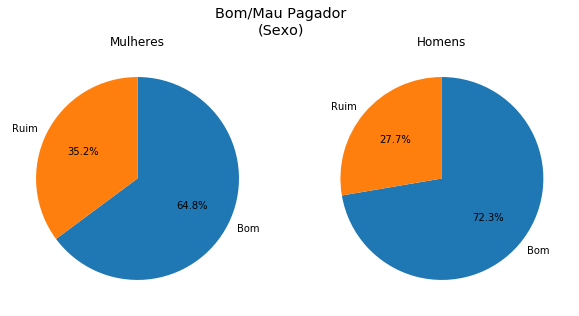

In [8]:
fem = base.loc[base['ESTADOCIVIL'] == 'fem div/cas']
masc = base.loc[base['ESTADOCIVIL'] != 'fem div/cas']

compara_sexos()

Text(0.5, 1.0, 'Homens Divorciados/Separados')

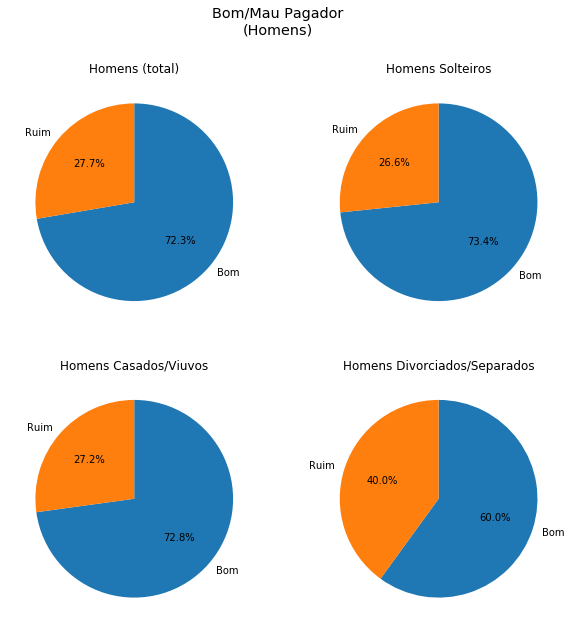

In [10]:
# Analise Devedores Masculinos
masc_bom = len(masc.loc[masc['CLASSE'] == 'bom'])
masc_ruim = len(masc.loc[masc['CLASSE'] == 'ruim'])

plt.figure(figsize=(10,10))
plt.suptitle("Bom/Mau Pagador\n(Homens)", fontsize="x-large")
plt.subplot(2,2,1)
plt.pie([masc_bom, masc_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
        autopct= lambda p: '{:.1f}%'.format(p))
plt.title('Homens (total)')


# Homens Solteiros
masc['ESTADOCIVIL'].unique()

masc_bom = masc.loc[masc['CLASSE'] == 'bom']
masc_ruim = masc.loc[masc['CLASSE'] == 'ruim']

solt_bom = len(masc_bom.loc[masc_bom['ESTADOCIVIL'] == 'masculino solteiro'])
solt_ruim = len(masc_ruim.loc[masc_ruim['ESTADOCIVIL'] == 'masculino solteiro'])

plt.subplot(2,2,2)
plt.pie([solt_bom, solt_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
        autopct= lambda p: '{:.1f}%'.format(p))
plt.title('Homens Solteiros')


# Homens Casados/Viuvos
cas_bom = len(masc_bom.loc[masc_bom['ESTADOCIVIL'] == 'masculino casado/viuvo'])
cas_ruim = len(masc_ruim.loc[masc_ruim['ESTADOCIVIL'] == 'masculino casado/viuvo'])

plt.subplot(2,2,3)
plt.pie([cas_bom, cas_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
        autopct= lambda p: '{:.1f}%'.format(p))
plt.title('Homens Casados/Viuvos')


# Homens Divorciados/Separados
div_bom = len(masc_bom.loc[masc_bom['ESTADOCIVIL'] == 'masculino div/sep'])
div_ruim = len(masc_ruim.loc[masc_ruim['ESTADOCIVIL'] == 'masculino div/sep'])

plt.subplot(2,2,4)
plt.pie([div_bom, div_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
        autopct= lambda p: '{:.1f}%'.format(p))
plt.title('Homens Divorciados/Separados')


### Conclusão
Na comparação entre sexo, os **homens** se mostram **melhores pagadores** de crédito que as mulheres.

Contudo, **homens divorciados** se mostram ser pagadores menos confiáveis em comparação com os demais, inclusive em comparação com o sexo oposto.

## Opção de Análise de cada Atributo
A opção a seguir permite realizar a análise gráfica dos diversos atributos que compõem a base de dados.

É disponibilizada também a informação referente ao volume de registros que se tem de cada valor do atributo a fim de oferecer a oportunidade de analisar a confiança do resultado.

In [26]:
# =====   Analise por Atributo   ===== #
def analise_confianca(atributo):
    plt.figure(figsize=(11,5))
    for prop in base[atributo].unique():
        registros = base.loc[base[atributo] == prop]
        n_reg = len(registros)
    
        n_bom = len(registros.loc[registros['CLASSE'] == 'bom'])
        plt.barh(str(prop).title(), n_reg, color='gray')
        plt.barh(str(prop).title(), n_bom, color='orange')
    plt.title("Quantidade de Registros")    
    plt.grid(axis='x')

def analise_atributo(atributo):
    from math import ceil
    n_row = ceil(len(base[atributo].unique()) / 2)
    j = 1
    plt.figure(figsize=(11,12))
    plt.suptitle("Bom/Mau Pagador\n({})".format(atributo.title()), fontsize="x-large")
    for opt_value in base[atributo].unique():
        registros = base.loc[base[atributo] == opt_value]

        reg_bom = len(registros.loc[registros['CLASSE'] == 'bom'])
        reg_ruim = len(registros.loc[registros['CLASSE'] == 'ruim'])
    
        plt.subplot(n_row, 2, j)
        plt.pie([reg_bom, reg_ruim], labels=['Bom', 'Ruim'], startangle=90, counterclock=False,
                autopct= lambda p: '{:.1f}%'.format(p))
        plt.title('{}'.format(str(opt_value).title()))
        j += 1
    
    analise_confianca(atributo)

Opções de atributos:
 CHEQUEESPECIAL
 HISTORICO_CREDITO
 PROPOSITO
 BALANCO_MEDIO_CREDITO
 EMPREGADO
 LOCAL
 ESTADOCIVIL
 OUTRASFUNCOES
 RESIDENCIADESDE
 TIPOSBENS
 OUTROSPLANOSPGTO
 RESIDENCIA
 CREDITOSEXISTENTES
 EMPREGO
 DEPENDENTES
 TRABAESTRANGEIRO


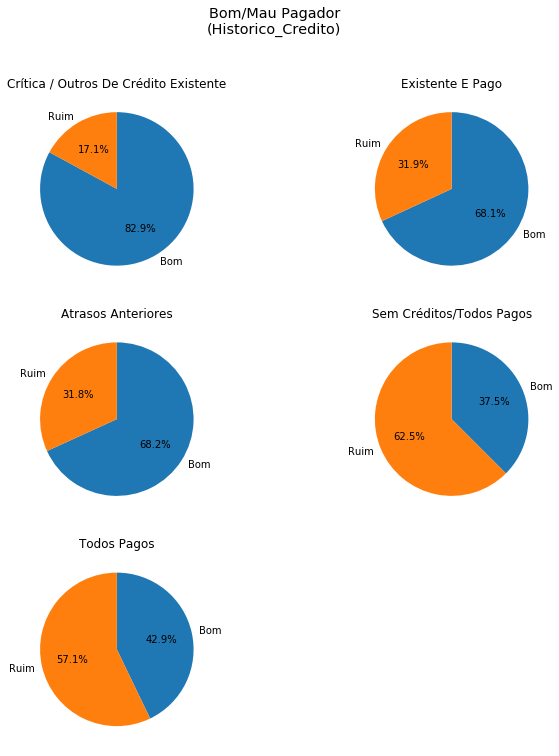

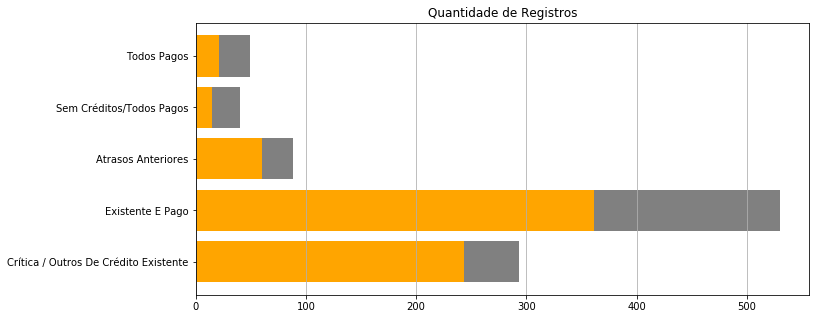

In [27]:
list_atributos = list(base.columns)
del(list_atributos[19], list_atributos[12], list_atributos[4], list_atributos[1]) # remove valores numericos continuos
print("Opções de atributos:", *list_atributos, sep='\n ')

analise_atributo('HISTORICO_CREDITO')

#### Análise Histórico de Crédito
Um fato curioso constatado:
Pessoas com *HISTÓRICO DE CREDITO* **'crítico'** tendem a ser pagadores mais confiáveis.
Enquanto que pessoas com *HISTÓRICO DE CREDITO* **'todos pagos'** se mostram em maioria pagadores menos confiáveis.

Vale ressaltar que há, relativamente, um número baixo de registros com este último histórico de crédito